Lucas Behrend y Martina Cenedese
Problema a resolver: Buscamos clasificar imagenes en 8 clases (angry, confused, disgust, happy, neutral, shy y surprise), según la emoción expresada.
Lo resolvemos mediante una CNN.

In [1]:
!pip install pillow
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install matplotlib
!pip install keras
!pip install scikit-learn
!pip install keras-visualizer
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from PIL import Image
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras_visualizer import visualizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

2023-11-21 02:51:23.231352: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 02:51:23.429862: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 02:51:23.429973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 02:51:23.430121: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 02:51:23.465647: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 02:51:23.468353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
file = '/home/demo/fane_data/'
alto = 148
ancho = 115

dataset = image_dataset_from_directory(file, image_size=(alto, ancho), batch_size= 1024)
class_names = dataset.class_names
class_names

Found 14012 files belonging to 8 classes.


['angry', 'confused', 'disgust', 'happy', 'neutral', 'sad', 'shy', 'surprise']

In [ ]:
# sizes = []
# for imagen in imagenes:
  # sizes.append(imagen.size)
# suma_ancho = sum(par[0] for par in sizes)
# suma_alto = sum(par[1] for par in sizes)
# promedio_ancho = suma_ancho / len(imagenes)
# promedio_alto = suma_alto / len(imagenes)
# alto = int(promedio_alto)
# ancho = int(promedio_ancho)
# print (ancho, alto)
#Esta celda era para calcular el promedio de tamaño de las imágenes, ya no es necesaria por la funcion image_dataset_from_directory y el parametro image_size.

In [ ]:
# Esta celda resizeaba imagenes
# resized_images = []
# for imagen in imagenes:
  # resized_image = imagen.resize((ancho, alto))
  # resized_images.append(resized_image)

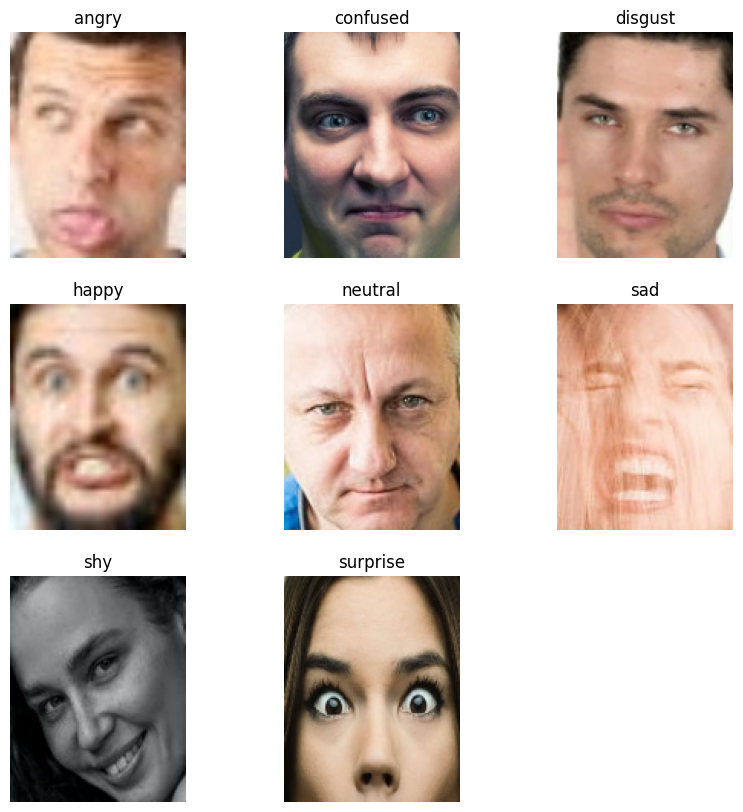

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    unique_labels = set(labels.numpy())

    for i, label in enumerate(unique_labels):
        # Encontrar el índice de la primera imagen con la etiqueta actual
        index = next(index for index, l in enumerate(labels.numpy()) if l == label)

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[index].numpy().astype("uint8"))
        plt.title(class_names[label])
        plt.axis("off")

In [5]:
# Obtener las labels y las imágenes desde el dataset
images = []
labels = []
for image_batch, label_batch in dataset:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

# Convertir a arrays numpy y convertir las labels a one hot encoding
dataset = None
images = np.array(images)
labels = np.array(labels)
labels = tf.one_hot(labels, 8)
labels = np.array(labels)
print(images.shape, labels.shape)

(14012, 148, 115, 3) (14012, 8)


In [6]:
#Separar los datos en train y test.
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)
images = None
labels = None
print("Forma de train_images después de eliminar índices problemáticos:", train_images.shape)
print("Forma de train_labels después de eliminar índices problemáticos:", train_labels.shape)

Forma de train_images después de eliminar índices problemáticos: (11209, 148, 115, 3)
Forma de train_labels después de eliminar índices problemáticos: (11209, 8)


In [7]:
#Crear arquitectura del modelo
modelo = models.Sequential()
modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(alto, ancho, 3))) #Hace una convolucion con un kernel de 3x3
modelo.add(layers.AveragePooling2D(pool_size=(2, 2))) #Selecciona el promedio de valores de pixeles en una region de 2x2
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2))) #Selecciona el valor mas alto de valores de pixeles en una region de 2x2
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Flatten()) #Aplana los pixeles para meterlos como inputs a la red neuronal
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(8, activation='softmax'))  # Capa de salida con 8 neuronas y función de activación softmax

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo (ajusta el número de épocas según sea necesario)
modelo.fit(train_images, train_labels, batch_size = 16, epochs=15, validation_split=0.2)

predictions = modelo.predict(test_images)
accuracy = test_labels - predictions
print(accuracy)

2023-11-21 02:54:46.044741: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1831420080 exceeds 10% of free system memory.


Epoch 1/15
362/561 [==================>...........] - ETA: 35s - loss: 2.5107 - accuracy: 0.1792

In [16]:
visualizer(modelo, file_format='png')

ValueError: [Keras Visualizer] Error while visualizing: <class 'Exception'>